# Pathfinder Application (General)
Author: R. Mitchell (email: s1432329@sms.ed.ac.uk)

### Feedback
Questions, comments, suggestions, or requests for functionality are welcome and can be sent to the email address above. This tool will continue development on an 'as-required' basis (i.e. I will add features when I need them, or when somebody asks me for them)!

## Usage ##
The software must be configured (via a configuration file) before it can be run. The configuration information is stored in a separate configuration file which we can't currently open in Jupyter Notebooks (though I'm working on it). The default file is located at &lt;Project Root&gt;/configurations/config.yaml. The file is written in the YAML format (https://yaml.org/) and an example is shown below (see Configuration). Once the configuration is complete the software can be run from here by selecting "Cell -> Run All" from the menu above. The software will display four plots:

![Example plot](img/ExamplePlot.png)

This image shows a simple setup in which a single light cue is displaced by 180$^{\circ}$ for the second roll. We simulate the scenario where the beetle performs two rolls and the cue placement is changed for the second roll. The first roll is shown in the left column and the second in the right. The top row shows a 3D representation of the world which can be rotated (left-click and drag) and enlarged (right-click and drag up/down) allowing the user to see the 3D spatial relationship of the different cues. The bottom row shows a top-down view similar to those commonly used in the literature which gives a clear image of the simulated beetle's chosen direction in both rolls and how they differ. Legends are provided per row. Terminal output is also given with the exact numbers. In the first roll the simulated beetle always choses to move towards 0$^{\circ}$ (mimicking the angular normalisation commonly used in the literature) which allows us to see the bearing change clearly on the graph. The radii of the hemispheres and circles are all 1.

# To run the application, run the two code cells below

You can select an alternate configuration file. All configuration files must be stored in &lt;Project Root&gt;/configurations. For more on the configuration format, see Configuration below. 

In [2]:
configuration_file = "untracked_config.yaml"

Project root directory: /home/robert/phd/1/pathfinder/pathfinder
Using configuration file: /home/robert/phd/1/pathfinder/pathfinder/configurations/untracked_config.yaml
=== Optional configuration ===
show-labels: False
show-geometry: True
show-individual: True
combination-strategy: avg
confidence-threshold: 0
light-multiplier: 1
wind-multiplier:  1



<IPython.core.display.Javascript object>


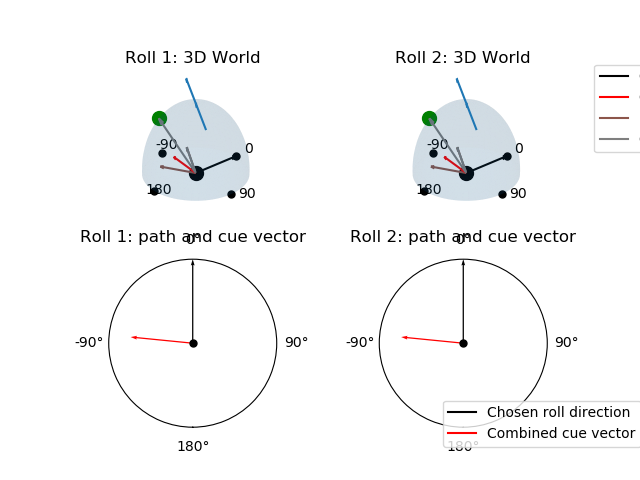

NOT DONE
DONE
Confidence in first combined cue: 0.7428167306251502
Confidence in second combined cue: 0.7428167306251502
Absolute change in bearing: 0.0


In [5]:
# Do not edit this cell!
%matplotlib qt
from pathfinder.testbed.scratch import main
main(configuration_file)

# Software information
Below is a condensed version of how the software works, how to configure it, and how to interpret its output. If there is anything which is unclear which is not discussed below, please get in touch.

## How does the beetle get its bearing? 
To the best of our knowledge, a dung beetle's initial bearing selection is random. In the simulated beetle's first roll, the beetle will always travel towards $0^\circ$ (shown in black). This is not only easier from a development standpoint but it also means the plots are normalised such that the direction from the second roll can be taken as the absolute change in bearing (as in the literature). 

Each cue is described by a ***sensory vector*** which indicates how the cue will be perceived by the beetle. These are the descriptions we must combine or integrate to get a single directional cue; cue sensory vectors are combined using a ***combination strategy***. This strategy dictates how the cues will be integrated; for example, we may wish to ignore all light cues below a certain strength or we may wish to artificially reduce the weighting of lights above a certain elevation etc. There are any number of strategies we could add. The default strategy (and that used by all of our examples) is simply to take the average (mean) of all sensory vectors present. Combining the sensory vectors will give us some resultant vector which points into the 3D space. We want this to be a directional cue in the ground plane so we **always** project this resultant vector onto the ground plane (regardless of the strategy employed). The ground projection of the resultant 3D vector is called the ***combined cue***. The combined cue (red) represents the single directional reference used by the beetle to orient, its magnitude gives us a measure of ***confidence***. A longer combined cue vector represents a more salient directional reference and thus greater confidence, likewise a shorter combined cue vector represents a less salient directional reference and thus lesser confidence. Think of the sun at high elevation; you can still get some directional information from it but it is not as clear as at an elevation of ~$45^\circ$.

In the example below, sensory vector visualisation is enabled (shown in grey); light-0 is twice as strong as light-1. As our cue combination strategy is to take an average, we add these vectors together then divide by two. The result is then projected onto the ground to give the combined cue vector (red). The beetle's path relative to the combined cue is given in black. The angle between the combined cue and the path is used to compute the simulated beetle's path for the second roll. 

![Sensory Vector Example](img/GeoVectorExamples.png)



## Configuration
Configuration is performed via an external YAML file (see Usage) at &lt;Project Root&gt;/pathfinder/configurations/config.yaml. A copy of the default configuration file is shown below for reference.

All values under 'settings' have default values and may be ommitted if desired. Both cues-roll-one and cues-roll-two must be defined and each must contain at least one cue (scope is defined by indentation, see https://yaml.org). Currently, only light and wind cues are supported. Light cues require elevation, azimuth, and strength to be specified. Wind cues require strength and direction. 

### Angles
Angles for elevation, azimuth, and wind direction are given in degrees. Elevation must be between 0^${\circ}$ and $90^{\circ}$. If you give a value outside these bounds it will be set to the closest bound. Azimuth can be specified as positive (clockwise) or negative (anti-clockwise). Wind direction is specified in the same way and is similarly unconstrained.

### Names and Types
Each cue must contain its type in its name and each cue must be uniquely named for each roll (you cannot have light-0 twice for roll one). The easiest way to do this is to name them: light-0, light-1, etc. It should be noted that any cue name is legal so long as it contains the type of the cue (e.g. "bright-light" would also be allowed) but for simplicity I stick to simply indexing the names. 

### Cue scaling
To represent an intrinsic preference for a particular type of cue I have included the cue-strength-scaling settings. These act as direct multipliers to the strength property of each cue (of the given type) across both rolls. The scaling factors allow us to see how behaviour changes under the same cue setup if the beetle is more or less sensitive to different types of cue. Scaling can be used to implement hierarchy (high scaling on preferred cue types), weighting (all cue types have a weight between 0 and 1 which must sum to 1), or gain (simple amplification of arbitrary cue types) but it is up to the user to ensure the values given are consistent and make sense. No checking is performed, except in the case of negatives.

### Input checking
The software will **not** check most configuration values. For all optional values, valid values (or ranges) are given. If a value is given which is invalid the software will most likely crash but may produce some odd results; for example, if a negative strength is given for a light cue and cue labelling is enabled, the light cue will not be present in the world but the label will appear at its elevation and azimuth.

### Cue consistency
The software will **not** check that the cue configurations between runs are sensible. For example if only light is used in the first run and only wind is used in the second run, the software will happily state that the beetle will respond to the wind direction when in reality you couldn't expect the beetle to extract the same bearing from a totally different set of cues. Again, it is up to the user to make sure the cue configurations given are somehow consistent between runs. There was no obvious way to perform this check at the granularity of a cue as lights may be added or removed to change the relative (or absolute) intensity pattern observed, however, a future addition may be to implement this check between cue types (e.g. only cue types present in the first roll may be present in the second).

## Output ##
Finally, I'll give some brief notes on the output. Consider the following example plot which has show-individual: True, show-labels: True, and confidence-threshold: 0.3.

![Display Example Image](img/DisplayExample.png)

### Plots ###
#### Cue types
This example shows how different cue types are displayed. Lights are represented as green orbs with a size proportional to their strength (stronger light -> bigger orb). Wind cues are shown using blue vectors positioned above the world which point in the direction that the wind is blowing.

#### Labelling
Setting show-labels to True will cause the cue name (given in the config file) to be displayed next to the cue in the 3D space.

#### Individual cue vectors
Setting show-individual to True results in the brown vectors on the ground. These represent the cue vector given if only that cue were being considered (i.e. each cue's geometry vector projected onto the ground). These give an idea of the direcional "pull" given by each cue.

#### Confidence threshold
The confidence threshold is shown only in the top-down plots. This shaded grey circle represents the minimum confidence required for successful orientation. If the combined cue tip is within the grey circle then we expect that the beetle would not have sufficient directional information to orient itself.

#### Cue confidence (2D)
In the 2D plots, the combined cue magnitude is limited to 1, otherwise it would run off the plot and the tip would be obscured. The true combined cue vector is shown in the 3D plots and the magnitude is printed at the console (see below). It was assumed that a combined cue vector of length &gt;= to 1 provided more than enough directional information for orientation.

#### A note on the graphics
With all options enabled and multiple cues the plots quickly become difficult to read. Labelling can help up to a point but can also add to the problem. In certain circumstances, vectors may overlap and obscure eachother (depending on the order they're drawn) making it difficult (or sometimes impossible) to see some of the information displayed. It's worth bearing this in mind when configuring the display settings. 

Irritatingly, matplotlib will auto-scale the 3D plots which can skew the display (e.g. making light orbs appear far larger than they should be or fumbling the aspect ratio). This doesn't have a functional effect but again it can make the plots hard to read. Similarly the legends can be obscured if the matplotlib window isn't large enough. I always view the plots full screen on a landscape oriented monitor (all images in this notebook were produced with that setup).

### Console output 
The console output is largely self explanatory. The project root and configuration file path are displayed, optional configuration information is displayed, and finally the output is displayed. I give confidence in the combined cues for both rolls and the absolute change in bearing. Higher confidence indicates more directional information, confidence less than the confidence-threshold indicates an inability to orient. Sufficiently low confidence may mean the absolute change in bearing is meaningless or a weak indication of behaviour.

![Console Example](img/ConsoleExample.png)